In [2]:
import numpy as np
import matplotlib.pyplot as plt
import visa
from time import sleep
from scipy.signal import find_peaks_cwt
import h5py
import sys

sys.path.insert(0, r'..\drivers')
import CFR200
import Tektronix2014B

rm = visa.ResourceManager()
rm.list_resources()

('USB0::0x0699::0x0368::C100692::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [3]:
laser_addr = 'COM3'
scope_addr = 'USB0::0x0699::0x0368::C100692::INSTR'

# Window reflectivity

QS-flashlamp delay set to 175 us, and QS frequency is 10 Hz. At these parameters, the laser has around 24 mJ per pulse.

In [ ]:
theta = np.arange(22.5,121,2.5)

voltages_th, std_voltages_th, num_pulses = [], [], []
with Tektronix2014B.Tektronix2014B(rm, scope_addr) as scope:
        for th in theta:
            print("please set the angle to "+str(th)+" degrees and press enter")
            input()
            
            # measure
            scope.SetAcqState('on')
            [x, y, xunit, yunit] = scope.get_waveform('CH1')
            
            # analyze peaks
            peaks = y[ find_peaks_cwt(y, [10]) ]
            num_pulses.append(len(peaks))
            voltages_th.append(np.mean(peaks))
            std_voltages_th.append(np.std(peaks))

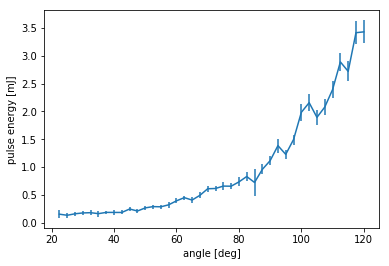

In [12]:
plt.errorbar(theta, 1000*np.array(voltages_th)/8.31, yerr=1000*np.array(std_voltages_th)/8.31)
plt.xlabel("angle [deg]");
plt.ylabel("pulse energy [mJ]");

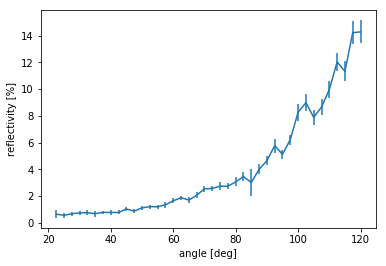

In [13]:
plt.errorbar(theta, 1000*np.array(voltages_th)/8.31/.24, yerr=1000*np.array(std_voltages_th)/8.31/.24)
plt.xlabel("angle [deg]");
plt.ylabel("reflectivity [%]");